# Exercise 4: Logistic Regression, Bayes and EM

In this assignment you will implement several algorithms as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in this notebook only. **Do not create Python modules and import them**.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install (1.15.4). Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
7. Write your own code. Cheating will not be tolerated.
8. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw4_123456789_987654321.ipynb` if you submitted in pairs and `hw4_123456789.ipynb` if you submitted the exercise alone.
9. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Implement Logistic Regression algorithm.
1. Implement EM algorithm.
1. Implement Navie Bayes algorithm that uses EM for calculating the likelihood.
1. Visualize your results.

# I have read and understood the instructions: *** 000803254 and 000802668 ***

In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function for ploting the decision boundaries of a model
# You will use it later
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('.', '.')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

## Reading the data

In [3]:
training_set = pd.read_csv('training_set.csv')
test_set = pd.read_csv('test_set.csv')
X_training, y_training = training_set[['x1', 'x2']].values, training_set['y'].values
X_test, y_test = test_set[['x1', 'x2']].values, test_set['y'].values

## Visualizing the data
(2 points each - 8 points total)

Plot the following graphs for the training set:

For the first feature only:
1. For the first 1000 data points plot a histogram for each class on the same graph (use bins=20, alpha=0.5).
1. For all the data points plot a histogram for each class on the same graph (use bins=40, alpha=0.5).

For both features:
1. For the first 1000 data points plot a scatter plot where each class has different color
1. For all the data points plot a scatter plot where each class has different color

In [4]:
# Print the dataset
print(training_set.head())

         x1        x2  y
0 -1.385789  9.131464  0
1 -2.236903  5.561178  0
2 -2.362524  5.215973  0
3 -0.499655  4.981781  0
4 -2.976062  6.236138  0


For the first feature only:

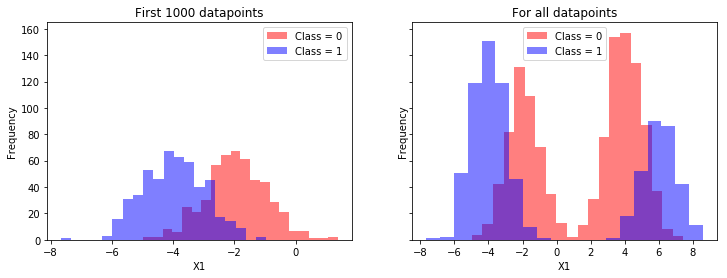

In [5]:
#### Your code here ####
# For the first feature only:
# For first 1000 points plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

first_feature_class = y_training[:1000]
itemindex = np.where(first_feature_class==1)

first_feature_0 = X_training[:itemindex[0][0],:1]
first_feature_1 = X_training[itemindex[0][0]:1000,:1]
ax = axes[0]
ax.hist(first_feature_0, bins=20, alpha=0.5, label='Class = 0', color="red")
ax.hist(first_feature_1, bins=20, alpha=0.5, label='Class = 1', color="blue")
ax.set_title("First 1000 datapoints")
ax.set_xlabel("X1")
ax.set_ylabel("Frequency")
ax.legend()

# For all data
# Sort the data for ease of plot
t = training_set.sort_values(by=['y'])

X_t, y_t = t[['x1', 'x2']].values, t['y'].values
itemindex = np.where(y_t==1)
first_feature_0 = X_t[:itemindex[0][0],:1]
first_feature_1 = X_t[itemindex[0][0]:,:1]
ax = axes[1]
ax.hist(first_feature_0, bins=20, alpha=0.5, label='Class = 0', color="red")
ax.hist(first_feature_1, bins=20, alpha=0.5, label='Class = 1', color="blue")
ax.set_title("For all datapoints")
ax.set_xlabel("X1")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()

For both features:

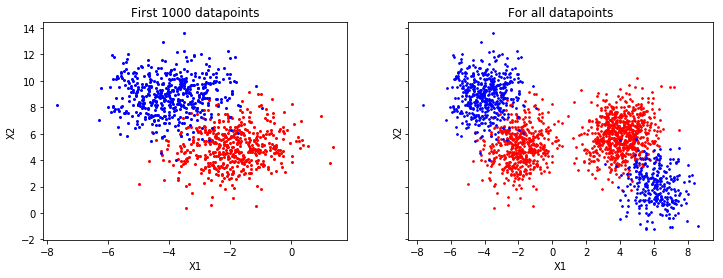

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

first_feature_class = y_training[:1000]
indexOfFirst1 = np.where(first_feature_class==1)
indexOfFirst0 = np.where(first_feature_class==0)

first_feature_0 = X_training[:indexOfFirst1[0][0],:1]
first_feature_1 = X_training[indexOfFirst1[0][0]:1000,:1]
second_feature_0 = X_training[:indexOfFirst1[0][0],1:]
second_feature_1 = X_training[indexOfFirst1[0][0]:1000,1:]
ax = axes[0]
ax.scatter(first_feature_0,second_feature_0, color="red",s=4)
ax.scatter(first_feature_1,second_feature_1, color="blue",s=4)
ax.set_title("First 1000 datapoints")
ax.set_xlabel("X1")
ax.set_ylabel("X2")

# Sort the data for ease of plot
t = training_set.sort_values(by=['y'])
X_t, y_t = t[['x1', 'x2']].values, t['y'].values

indexOfFirst1 = np.where(y_t==1)
first_feature_0 = X_t[:indexOfFirst1[0][0],:1]
second_feature_0 = X_t[:indexOfFirst1[0][0],1:]
first_feature_1 = X_t[indexOfFirst1[0][0]:,:1]
second_feature_1 = X_t[indexOfFirst1[0][0]:,1:]

ax=axes[1]
ax.scatter(first_feature_0,second_feature_0, color="red", s=3)
ax.scatter(first_feature_1,second_feature_1, color="blue",s=3)
ax.set_title("For all datapoints")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

## Logistic Regression

(20 Points)

Implement the Logistic Regression algorithm that uses gradient descent for finding the optimal theta vector. 

Where:
$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

$$
J(\theta)=\frac{1}{m} \sum_{d=1}^{m} - y^{(d)}ln(h_\theta(x^{(d)}) - (1 - y^{(d)})ln(1 - h_\theta(x^{(d)})
$$

Your class should contain the following functions:
1. fit - the learning function
1. predict - the function for predicting an instance after the fit function was executed

\* You can add more functions if you think this is necessary

Your model should also store a list of the costs that you've calculated in each iteration

In [7]:
class LogisticRegressionGD(object):
    """
    Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    eps : float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random weight
      initialization.
    """
    
    def __init__(self, eta=0.00005, n_iter=10000, eps=0.000001, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.eps = eps
        self.random_state = random_state
        self.J_history = []
        self.it = 0
    
    def hypothesis(self,z):
        """
        Returns  h_𝜃 
        """
        return 1.0 / (1 + np.exp(-z))
        
    def compute_cost(self,X,y,theta):
        """
        Returns J
        """
        observations = len(y)
        predictions = self.hypothesis(np.dot(X, np.transpose(self.theta)))
        #Take the error when label=1
        class1_cost = -y*np.log(predictions)
        #Take the error when label=0
        class2_cost = (1-y+self.eps)*np.log(1-predictions+self.eps)
        #Take the sum of both costs
        J_𝜃 = class1_cost - class2_cost
        #Take the average cost
        J_𝜃 = J_𝜃.sum() / observations
        return J_𝜃
       
    def update_weights(self, X, y):
        '''
        Vectorized Gradient Descent
        '''
        m = len(X)
        #Get Predictions
        predictions = self.hypothesis(np.dot(X, self.theta.T))
        gradient = np.dot(np.transpose(X),  predictions - y)
        #Take the average cost derivative for each feature
        gradient /= m
        #Multiply the gradient by our learning rate
        gradient *= self.eta
        #Subtract from our weights to minimize cost
        self.theta -= np.transpose(gradient)
        return self.theta

    def fit(self, X, y):
        """ 
        Fit training data (the learning phase).
        Updating the theta vector in each iteration using gradient descent.
        Store the theta vector in an attribute of the LogisticRegressionGD object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        """
        ###########################################################################
        # TODO: Implement the (logistic) gradient descent optimization algorithm.            
        ###########################################################################
        np.random.seed(self.random_state)
        # Bias trick
        X = np.insert(X,0,1.0,axis=1)
        y = np.reshape(y, (len(y),1))
        self.theta = np.array([np.random.random(size=X.shape[1])])
        for i in range(self.n_iter-10):
            theta = self.update_weights(X, y)
            #Calculate error
            cost = self.compute_cost(X, y, self.theta)
            self.J_history.append(cost)
            self.it = i
            if(i > 1 and (self.J_history[-2] - self.J_history[-1] < self.eps)):
                  break
        return self.theta, self.J_history
        
    def predict(self, X):
        """Return the predicted class label"""
        if len(X.shape)>1 and len(self.theta.shape)>1 and X.shape[1]!= self.theta.shape[1]:
            X = np.insert(X,0,1.0,axis=1)
        z = np.dot(X, np.transpose(self.theta))
        z=self.hypothesis(z)
        z[z>0.5]=1
        z[z<=0.5]=0
        return z
    
    


## Cross Validation

(10 points)

Use 5-fold cross validation in order to find the best eps and eta params from the given lists.

Shuffle the training set before you split the data to the folds.

In [8]:
def calc_accuracy(prediction, labels):
    count = 0
    for i in range(len(prediction)):
        pred_label = 0
        if prediction[i]> 0.5:
            pred_label = 1
        if pred_label == labels[i]:
            count +=1        
    return count/len(labels)

In [9]:
#### Your code here ####
etas = [0.05, 0.005, 0.0005, 0.00005, 0.000005]
epss = [0.01, 0.001, 0.0001, 0.00001, 0.000001]

# Combine X,y as one
p = training_set.copy()
p= p[['x1', 'x2','y']].values
# Shuffle list
np.random.shuffle(p)
#print(len(X_training))

# Split training data into 5 fold lists
fold_training = np.array_split(p, 5)
best_eps = 0
best_eta = 0
highest_pred = 0
for i in range(5):
    validation_set = fold_training[i]
    X_val,y_val = validation_set[:,:-1], validation_set[:,2:]
    
    temp = fold_training.copy()
    temp.pop(i)
    training_sets = [j for i in temp for j in i]
    training_sets = np.array(training_sets)
    
    X_train,y_train = training_sets[:,:-1], training_sets[:,2:]
    for j in range(5):
        for k in range(5):
           
            log_regress = LogisticRegressionGD(eta=etas[i], n_iter=10000, eps=epss[j], random_state=1)
            log_regress.fit(X_train,y_train)
            pred = log_regress.predict(X_val)
            t = calc_accuracy(pred, y_val)
            if t > highest_pred:
                print("Updated highest vals for Eta Val:",etas[j],"and Eps Val:", epss[k], "and fold number:",i)
                highest_pred = t
                best_eps = epss[j]
                best_eta = etas[i]

Updated highest vals for Eta Val: 0.05 and Eps Val: 0.01 and fold number: 0
Updated highest vals for Eta Val: 0.005 and Eps Val: 0.01 and fold number: 0
Updated highest vals for Eta Val: 0.0005 and Eps Val: 0.01 and fold number: 0
Updated highest vals for Eta Val: 5e-05 and Eps Val: 0.01 and fold number: 0
Updated highest vals for Eta Val: 5e-06 and Eps Val: 0.01 and fold number: 0


In [10]:
print("The highest accuracy found was:", highest_pred)
print("This was found using Eta Value:",best_eta,"and Eps Value:",best_eps)

The highest accuracy found was: 0.765
This was found using Eta Value: 0.05 and Eps Value: 1e-06


## Normal distribution pdf

(5 Points)

Implement the normal distribution pdf 
$$
f(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big{(}\frac{x-\mu}{\sigma}\big{)}^2}
$$
Write an efficient vectorized code

In [11]:
#### Your code here ####
# calc normal pdf    
def norm_pdf(data, mu, sigma):
    matrix_form = isinstance(data, np.ndarray)
    norm = 1.0 / np.sqrt(2.0*np.pi*(sigma**2))
    if matrix_form:
        norm = norm*np.exp(((-0.5 / (sigma**2)) * (data - mu) ** 2))
    else:
        norm =norm*np.exp(-1.0 * pow((data - mu),2)/(2.0 * (sigma**2)))
    return norm

## Expectation Maximization

(20 Points)

Implement the Expectation Maximization algorithm for gaussian mixture model.

The class should hold the distribution params.

Use -log likelihood as the cost function:
$$
cost(x) = \sum_{d=1}^{m}-log(w * pdf(x; \mu, \sigma))
$$

\* The above is the cost of one gaussian. Think how to use the cost function for gaussian mixture.

Your class should contain the following functions:
1. init_params - initialize distribution params
1. expectation - calculating responsibilities
1. maximization - updating distribution params
1. fit - the learning function
1. get_dist_params - return the distribution params

\* You can add more functions if you think this is necessary

Don't change the eps params (eps=0.01)

When you need to calculate the pdf of a normal distribution use the function `norm_pdf` that you implemented above.

In [12]:
class EM(object):
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for
    calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    n_iter : int
      Passes over the training dataset in the EM proccess
    eps: float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random params initialization.
    """
    
    def __init__(self, k=1, n_iter=100, eps=0.01):
        self.k = k
        self.n_iter = n_iter
        self.eps = eps
        self.J_history = [0,1]

    # initial guesses for parameters
    def init_params(self, data):
        """
        Initialize distribution params
        """
        self.m = data.shape
        split = np.array_split(data, self.k)
        self.w = np.random.rand(self.k,)
        self.mean_arr = []
        self.sigma_arr = []
        self.resp = []
        
        for i in range(self.k):
            self.mean_arr.append(np.mean(split[i]))
            self.sigma_arr.append(np.std(split[i]))
        
        return(self.w, self.mean_arr, self.sigma_arr)
        
        
    def expectation(self, data):
        """
        E step - calculating responsibilities
        """
        # Calculate pdfs
        norm_pdf_calc = []
        for i in range(self.k):
            norm_pdf_calc.append(np.array(norm_pdf(data, self.mean_arr[i], self.sigma_arr[i])))
        self.resp = np.array(norm_pdf_calc).transpose()
        # Multiply the responsibilites by the weights
        self.resp *= self.w
        # We must now divide by the sum
        self.resp /= np.sum(self.resp, axis=1).reshape([data.shape[0],1])
        return(self.resp)
            
   
    def maximization(self, data):
        """
        M step - updating distribution params
        """
        new_w = []
        new_mean_arr = []
        new_sigma_arr = []
        for k in range(self.k):
            # get k-th responsibility
            resp_k = self.resp[:,k]
            # Calc new weights
            new_w.append(np.sum(resp_k) /data.shape[0])
            # Calc new mean
            new_mean_arr .append(np.sum(resp_k * data) * (1 / (new_w[k] * data.shape[0])))
            # Calc new sigma
            new_sigma_arr.append(np.sqrt(np.sum(resp_k*np.square(data - np.sum(resp_k * data) * (1 / (new_w[k] * data.shape[0])))) / 
                                         (new_w[k] * data.shape[0])))
        # Set the current variables to the new ones    
        self.w = new_w
        self.mean_arr = new_mean_arr
        self.sigma_arr = new_sigma_arr
        return(self.w, self.mean_arr , self.sigma_arr)

    def fit(self, data):
        """ 
        Fit training data (the learning phase).
        Use init_params and then expectation and maximization function in order to find params 
        for the distribution. 
        Store the params in attributes of the EM object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.
        """
        iteration = 0
        self.init_params(data)
        while ((iteration < self.n_iter) and (np.absolute(self.J_history[-1] - self.J_history[-2]) > self.eps)):
            self.expectation(data)
            self.maximization(data)
            self.calc_likelihood(data)
            iteration+=1
        
    def calc_likelihood(self, data):
        # Calculate the norm pdf using the current mean, sigma
        norm_pdf_calc = []
        for i in range(self.k):
            norm_pdf_calc.append(np.array(norm_pdf(data, self.mean_arr[i], self.sigma_arr[i])))
        norm_pdf_calc = np.array(norm_pdf_calc)
        cost = 0
        for i in range(data.shape[0]):
            temp = 0
            for k in range(self.k):
                temp += self.w[k] * norm_pdf_calc[k,i]
            cost += -1 * np.log(temp)
        self.J_history.append(cost)
        return cost
        
    def get_dist_params(self):
        return (self.w, self.mean_arr, self.sigma_arr)
   

## Naive Bayes

(20 Points)

Implement the Naive Bayes algorithm.

For calculating the likelihood use the EM algorithm that you implemented above to find the distribution params. With these params you can calculate the likelihood probability.

Calculate the prior probability directly from the training set.

Your class should contain the following functions:
1. fit - the learning function
1. predict - the function for predicting an instance (or instances) after the fit function was executed

\* You can add more functions if you think this is necessary


In [13]:
class NaiveBayesGaussian(object):
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    random_state : int
      Random number generator seed for random params initialization.
    """
    
    def __init__(self, k=1):
        self.k = k
        self.params = {}
        self.classes = None

    def calc_prior(self, y):
        # Calculate prior probability
        values, counts = np.unique(y, return_counts=True)
        total_count = sum(counts)
        self.c = values
        self.count = counts
        for cls in values:
            self.params[cls] = {}
            self.params[cls]["prior"] = (counts[np.where(values == cls)] / total_count)
        
    def fit(self, X, y):
        """ 
        Fit training data.

        Parameters
        ----------
        X : array-like, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        """
        joint_data = np.insert(X,X.shape[1], y, axis=1)
        features = X.shape[1]
        self.calc_prior(y)
        for class_val in self.c:
            for feature in range(features):
                
                boolean_arr = joint_data[:,-1] == class_val
                class_data = joint_data[boolean_arr][:,feature]
                class_EM = EM(k=self.k)
                class_EM.fit(class_data)
                self.params[class_val][feature] = class_EM.get_dist_params()
        self.classes = len(self.count) 
    
    
    def predict(self, X):
        """Return the predicted class label"""
        features = X.shape[1]
        class_prob = np.ones((X.shape[0], self.classes))
        for class_value in self.c:
            for feature in range(features):
                feature_data = X[:,feature]
                probs = np.zeros((self.k ,feature_data.shape[0]))
                for k_val in range(self.k):
                    # get w,mean and sigma
                    w = self.params[class_value][feature][0][k_val]
                    mean = self.params[class_value][feature][1][k_val]
                    sigma=self.params[class_value][feature][2][k_val]
                    prob = norm_pdf(feature_data, mean,sigma) 
                    prob *= w
                    probs[k_val] = prob
                class_prob[:, int(class_value)] *= np.sum(probs, axis=0)
            class_prob[:, int(class_value)] *= self.params[class_value]["prior"]
        
        final_prob_arr = []
        for prob in class_prob:
            if prob[0] > prob[1]:
                final_prob_arr.append(0)
            else:
                final_prob_arr.append(1)
        return np.array(final_prob_arr ) 
   

## Model evaluation

(10 points)

In this section you will build 2 models and fit them to 2 datasets

First 1000 training points and first 500 test points:
1. Use the first 1000 points from the training set (take the first original 1000 points - before the shuffle) and the first 500 points from the test set.
1. Fit Logistic Regression model with the best params you found earlier.
1. Fit Naive Bayes model. Remember that you need to select the number of gaussians in the EM.
1. Print the training and test accuracies for each model.
1. Use the `plot_decision_regions` function to plot the decision boundaries for each model (for this you need to use the training set as the input)
1. Plot the cost Vs the iteration number for the Logistic Regression model

Use all the training set points:
1. Repeat sections 2-6 for all the training set points

In [14]:
# Datasets
X_training_1000 = training_set[:1000].values
X_training_1000_feature = X_training_1000[:,0:-1]
X_training_1000_label = X_training_1000[:,-1]


X_test_500 = test_set[:500].values
X_test_500_feature = X_test_500[:,0:-1]
X_test_500_label = X_test_500[:,-1]

In [15]:
#Logistic regression
calculations_dict = {}
log_regress = LogisticRegressionGD(eta=best_eta, n_iter=10000, eps=best_eps, random_state=1)

log_regress.fit(X_training_1000_feature,X_training_1000_label)
pred = log_regress.predict(X_training_1000_feature)
accu = calc_accuracy(pred, X_training_1000_label)
calculations_dict["Logisitic regression (1000) training point"] = {"Accuracy":accu}

pred = log_regress.predict(X_test_500_feature)
accu = calc_accuracy(pred, X_test_500_label)
calculations_dict["Logisitic regression (500) test point"] = {"Accuracy":accu}

In [16]:
# Niave based
nb = NaiveBayesGaussian(k=1)

nb.fit(X_training_1000_feature, X_training_1000_label)
prediction = nb.predict(X_training_1000_feature)
accuracy = np.sum(prediction == X_training_1000_label) / X_training_1000.shape[0]
calculations_dict["Niave bayes (1000) training point"] = {"Accuracy":accuracy}

prediction = nb.predict(X_test_500_feature)
accuracy = np.sum(prediction == X_test_500_label) / X_test_500.shape[0]
calculations_dict["Niave bays (500) testing point"] = {"Accuracy":accuracy}

In [17]:
# Printing values
for i in calculations_dict.keys():
    print("Accuracy for",i, "is",calculations_dict[i]["Accuracy"])

Accuracy for Logisitic regression (1000) training point is 0.965
Accuracy for Logisitic regression (500) test point is 0.938
Accuracy for Niave bayes (1000) training point is 0.966
Accuracy for Niave bays (500) testing point is 0.942


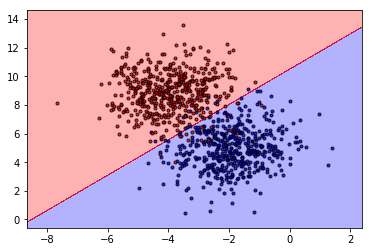

In [18]:
plot_decision_regions(X_training_1000_feature, X_training_1000_label, log_regress)

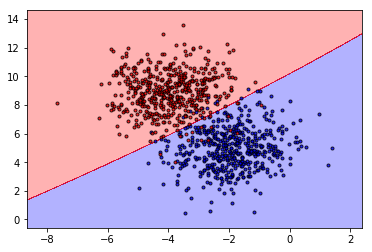

In [19]:
plot_decision_regions(X_training_1000_feature, X_training_1000_label, nb)

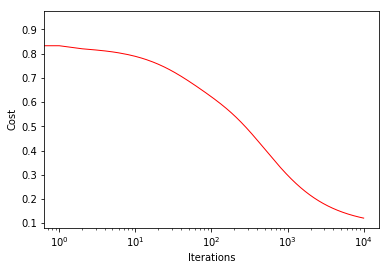

In [20]:
y = np.array(log_regress.J_history)
plt.plot([i for i in range(len(log_regress.J_history))], y, 'red', linewidth=1, markersize=2)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

For all dataset

In [21]:
X_training = training_set.values
X_training_feature = X_training[:,0:-1]
X_training_label = X_training[:,-1]


X_test = test_set.values
X_test_feature = X_test[:,0:-1]
X_test_label = X_test[:,-1]

In [26]:
#Logistic regression
calculations_dict = {}
log_regress = LogisticRegressionGD(eta=best_eta, n_iter=10000, eps=best_eps, random_state=1)

log_regress.fit(X_training_feature,X_training_label)
pred = log_regress.predict(X_training_feature)
accu = calc_accuracy(pred, X_training_label)
calculations_dict["Logisitic regression training point"] = {"Accuracy":accu}

pred = log_regress.predict(X_test_feature)
accu = calc_accuracy(pred, X_test_label)
calculations_dict["Logisitic regression test point"] = {"Accuracy":accu}

In [27]:
# Niave based
nb = NaiveBayesGaussian(k=1)

nb.fit(X_training_feature, X_training_label)
prediction = nb.predict(X_training_feature)
accuracy = np.sum(prediction == X_training_label) / X_training.shape[0]
calculations_dict["Niave bayes training point"] = {"Accuracy":accuracy}

prediction = nb.predict(X_test_feature)
accuracy = np.sum(prediction == X_test_label) / X_test.shape[0]
calculations_dict["Niave bays testing point"] = {"Accuracy":accuracy}

In [28]:
# Printing values
for i in calculations_dict.keys():
    print("Accuracy for",i, "is",calculations_dict[i]["Accuracy"])
log_regress.theta=np.delete(log_regress.theta, 0)

Accuracy for Logisitic regression training point is 0.796
Accuracy for Logisitic regression test point is 0.792
Accuracy for Niave bayes training point is 0.8845
Accuracy for Niave bays testing point is 0.873


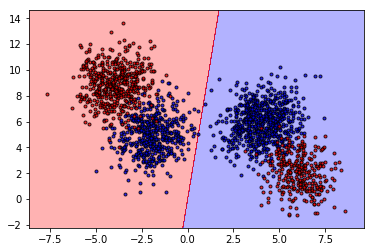

In [29]:
plot_decision_regions(X_training_feature, X_training_label, log_regress)


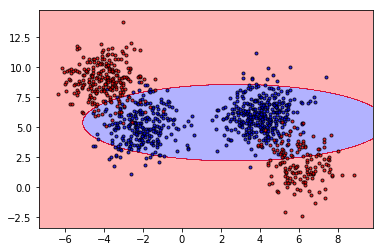

In [30]:
plot_decision_regions(X_test_feature, X_test_label, nb)

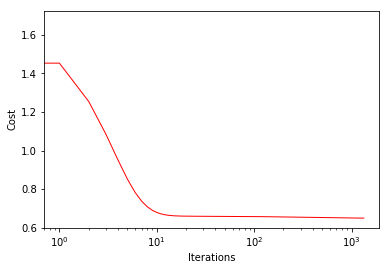

In [31]:
y = np.array(log_regress.J_history)
plt.plot([i for i in range(len(log_regress.J_history))], y, 'red', linewidth=1, markersize=2)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Open question

(7 points) 

Will Full Bayes get better results comparing to Naive Bayes on the following dataset? Explain. 

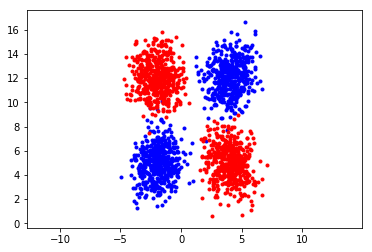

In [32]:
mean = [[-2,5], [-2, 12], [4, 12], [4, 5]]
cov = [[[1,0.2],[0.2,2]], [[1,0],[0,2]], [[1,0.2],[0.2,2]], [[1,-0.2],[-0.2,2]]]
x1 = []
x2 = []
y = []
size = [500, 500, 500, 500]
c = ['b', 'r']
for i in range(4):
    xx1,xx2 = np.random.multivariate_normal(mean[i],cov[i],size[i]).T
    x1.extend(xx1)
    x2.extend(xx2)
    y.extend([i%2] * size[i])
    plt.scatter(xx1,xx2, marker='.', c=c[i%2])
plt.axis('equal')
plt.show()

#### Your answer here ####


Yes.
Full Bays will get better results. This is because Full Bays makes no assumptions on the correlation between X1 and X2. Therefore, Niave Bays makes the assumption that they are independant hence they are uncorrelated which is not the case therefore will most probably yield worse results.

End of Assingment